**Informe del Análisis de Calidad de Datos**

Resultados del análisis de calidad de los datos, identificando problemas encontrados (como valores faltantes o inconsistencias) y detallando las soluciones implementadas para garantizar la confiabilidad del análisis posterior.

In [2]:
import pandas as pd

# Load datasets
cash_request_df = pd.read_csv('../project_dataset/extract - cash request - data analyst.csv')
fees_df = pd.read_csv('../project_dataset/extract - fees - data analyst - .csv')

# Display basic information about the dataset
print("Basic Information extract - cash request - data analyst.csv:")
print(cash_request_df.info())

Basic Information extract - cash request - data analyst.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                    

In [3]:
# Display basic information about the dataset
print("Basic Information extract - fees - data analyst - .csv:")
print(fees_df.info())

Basic Information extract - fees - data analyst - .csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None


In [4]:
# Evaluate data quality
def evaluate_data_quality(df, df_name):
    print(f"Evaluating data quality for {df_name}...\n")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print(f"Missing values in {df_name}:\n{missing_values}\n")
    
    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"Duplicate rows in {df_name}: {duplicate_rows}\n")
    
    # Check for inconsistencies (example: negative values in columns that should only have positive values)
    for column in df.select_dtypes(include=['number']).columns:
        negative_values = (df[column] < 0).sum()
        if negative_values > 0:
            print(f"Column '{column}' in {df_name} has {negative_values} negative values.\n")
    
    # Summary statistics
    #print(f"Summary statistics for {df_name}:\n{df.describe()}\n")

In [5]:
# Evaluate data quality for extract - cash request - data analyst dataset
evaluate_data_quality(cash_request_df, 'extract - cash request - data analyst.csv')

Evaluating data quality for extract - cash request - data analyst.csv...

Missing values in extract - cash request - data analyst.csv:
id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

Duplicate rows in extract - cash request - data analyst.csv: 0



In [6]:
# Evaluate data quality for extract - fees - data analyst dataset
evaluate_data_quality(fees_df, 'extract - fees - data analyst - .csv')

Evaluating data quality for extract - fees - data analyst - .csv...

Missing values in extract - fees - data analyst - .csv:
id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

Duplicate rows in extract - fees - data analyst - .csv: 0



In [7]:
# Rename the columns of the fees dataset
fees_df_modified = fees_df.rename(columns=lambda x: x + '_fee' if x != 'cash_request_id' else x)
print("Result of add '_fee' to each column of extract - fees - data analyst - .csv:")
print(fees_df_modified.info())

Result of add '_fee' to each column of extract - fees - data analyst - .csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_fee             21061 non-null  int64  
 1   cash_request_id    21057 non-null  float64
 2   type_fee           21061 non-null  object 
 3   status_fee         21061 non-null  object 
 4   category_fee       2196 non-null   object 
 5   total_amount_fee   21061 non-null  float64
 6   reason_fee         21061 non-null  object 
 7   created_at_fee     21061 non-null  object 
 8   updated_at_fee     21061 non-null  object 
 9   paid_at_fee        15531 non-null  object 
 10  from_date_fee      7766 non-null   object 
 11  to_date_fee        7766 non-null   object 
 12  charge_moment_fee  21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None


In [8]:
# Merge datasets on matching IDs
merged_df = pd.merge(cash_request_df, fees_df_modified, left_on='id', right_on='cash_request_id', how='inner')
# Save the merged dataset
merged_df.to_csv('../project_dataset/merged_cash_request_fees.csv', index=False)
print("Datasets merged successfully.")

Datasets merged successfully.


In [9]:
print("Merged datasets based on 'id' (extract - cash request - data analyst) and 'cash_request_id' (extract - fees - data analyst) columns:")
print(merged_df.info())

Merged datasets based on 'id' (extract - cash request - data analyst) and 'cash_request_id' (extract - fees - data analyst) columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21057 non-null  int64  
 1   amount                      21057 non-null  float64
 2   status                      21057 non-null  object 
 3   created_at                  21057 non-null  object 
 4   updated_at                  21057 non-null  object 
 5   user_id                     20151 non-null  float64
 6   moderated_at                11284 non-null  object 
 7   deleted_account_id          906 non-null    float64
 8   reimbursement_date          21057 non-null  object 
 9   cash_request_received_date  19763 non-null  object 
 10  money_back_date             19701 non-null  object 
 11  transfer_typ

In [10]:
# Evaluate data quality for merged dataset
evaluate_data_quality(merged_df, 'merged_cash_request_fees.csv')

Evaluating data quality for merged_cash_request_fees.csv...

Missing values in merged_cash_request_fees.csv:
id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                         906
moderated_at                   9773
deleted_account_id            20151
reimbursement_date                0
cash_request_received_date     1294
money_back_date                1356
transfer_type                     0
send_at                        3487
recovery_status               14163
reco_creation                 14163
reco_last_update              14163
id_fee                            0
cash_request_id                   0
type_fee                          0
status_fee                        0
category_fee                  18861
total_amount_fee                  0
reason_fee                        0
created_at_fee                    0
updated_at_fee             

In [11]:
# Define the data for the table
data = {
    'Column Name': [
        'user_id', 'moderated_at', 'deleted_account_id', 'cash_request_received_date', 
        'money_back_date', 'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
        'category_fee', 'paid_at_fee', 'from_date_fee', 'to_date_fee'
    ],
    'Code': [
        'Null', '98', '98888888', '98', 
        'Null', 'Null', '98', 'Null', 'Null',
        'Null', 'Null', '98', '98'
    ],
    'Explanation': [
        '?', 'No needed a manual review', 'No deleted account', 'No sent a SEPA direct debit', 
        '?', '?', 'The case request never had a payment incident', '?', '?',
        '?', '?', 'No postpone fees', 'No postpones fees'
    ]
}

# Create a DataFrame
missing_info_df = pd.DataFrame(data)

# Display the table
print("Codes for missing information based on Lexique - Data Analyst.xlsx:")
print(missing_info_df)

Codes for missing information based on Lexique - Data Analyst.xlsx:
                   Column Name      Code  \
0                      user_id      Null   
1                 moderated_at        98   
2           deleted_account_id  98888888   
3   cash_request_received_date        98   
4              money_back_date      Null   
5                      send_at      Null   
6              recovery_status        98   
7                reco_creation      Null   
8             reco_last_update      Null   
9                 category_fee      Null   
10                 paid_at_fee      Null   
11               from_date_fee        98   
12                 to_date_fee        98   

                                      Explanation  
0                                               ?  
1                       No needed a manual review  
2                              No deleted account  
3                     No sent a SEPA direct debit  
4                                               ?  
5  

In [12]:
# Fill missing values with specified values
merged_df['user_id'].fillna("Null", inplace=True)
merged_df['moderated_at'].fillna(98, inplace=True)
merged_df['deleted_account_id'].fillna(98888888, inplace=True)
merged_df['cash_request_received_date'].fillna(98, inplace=True)
merged_df['money_back_date'].fillna("Null", inplace=True)
merged_df['send_at'].fillna("Null", inplace=True)
merged_df['recovery_status'].fillna(98, inplace=True)
merged_df['reco_creation'].fillna("Null", inplace=True)
merged_df['reco_last_update'].fillna("Null", inplace=True)

merged_df['category_fee'].fillna("Null", inplace=True)
merged_df['paid_at_fee'].fillna("Null", inplace=True)
merged_df['from_date_fee'].fillna(98, inplace=True)
merged_df['to_date_fee'].fillna(98, inplace=True)

# Save the cleaned dataset
merged_df.to_csv('../project_dataset/cleaned_merged_cash_request_fees.csv', index=False)

print("Missing values have been filled and the cleaned dataset has been saved.")

# Evaluate data quality for cleaned and merged dataset
evaluate_data_quality(merged_df, 'cleaned_merged_cash_request_fees')

Missing values have been filled and the cleaned dataset has been saved.
Evaluating data quality for cleaned_merged_cash_request_fees...

Missing values in cleaned_merged_cash_request_fees:
id                            0
amount                        0
status                        0
created_at                    0
updated_at                    0
user_id                       0
moderated_at                  0
deleted_account_id            0
reimbursement_date            0
cash_request_received_date    0
money_back_date               0
transfer_type                 0
send_at                       0
recovery_status               0
reco_creation                 0
reco_last_update              0
id_fee                        0
cash_request_id               0
type_fee                      0
status_fee                    0
category_fee                  0
total_amount_fee              0
reason_fee                    0
created_at_fee                0
updated_at_fee                0
paid_at_fee

/var/folders/7z/00rgwf311yn2q_dbm8dwq25m0000gn/T/ipykernel_2915/1476439258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['user_id'].fillna("Null", inplace=True)
/var/folders/7z/00rgwf311yn2q_dbm8dwq25m0000gn/T/ipykernel_2915/1476439258.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df['user_id'].fillna("Null", inplace=True

In [13]:
# Convert the 'created_at' and 'created_at_fee' columns to datetime format
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])
merged_df['created_at_fee'] = pd.to_datetime(merged_df['created_at_fee'])

print("Conversion of the 'created_at' and 'created_at_fee' columns to datetime format:")
print(merged_df.info())

Conversion of the 'created_at' and 'created_at_fee' columns to datetime format:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          21057 non-null  int64              
 1   amount                      21057 non-null  float64            
 2   status                      21057 non-null  object             
 3   created_at                  21057 non-null  datetime64[ns, UTC]
 4   updated_at                  21057 non-null  object             
 5   user_id                     21057 non-null  object             
 6   moderated_at                21057 non-null  object             
 7   deleted_account_id          21057 non-null  float64            
 8   reimbursement_date          21057 non-null  object             
 9   cash_request_received_date  21057 non-null  obj

Calidad de los datos necesarios para las métricas:
1. **Frecuencia de Uso del Servicio:** Analizar con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de Business Payments a lo largo del tiempo. (“created_at” “transfer_type”)

In [14]:
# Evaluate data quality for 'created_at' and 'transfer_type' columns
def evaluate_needed_data_quality_for_frecuency(df, columns):
    for column in columns:
        print(f"Evaluating data quality for column: {column}\n")
        
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}\n")
        
        # Check for inconsistencies (example: invalid dates in 'created_at')
        if column == 'created_at':
            invalid_dates = pd.to_datetime(df[column], errors='coerce').isnull().sum()
            print(f"Invalid dates in {column}: {invalid_dates}\n")
        
        # Check for unique values in 'transfer_type'
        if column == 'transfer_type':
            unique_values = df[column].unique()
            print(f"Unique values in {column}: {unique_values}\n")

# Columns to evaluate
columns_to_evaluate = ['created_at', 'transfer_type']

# Evaluate data quality
evaluate_needed_data_quality_for_frecuency(merged_df, columns_to_evaluate)

Evaluating data quality for column: created_at

Missing values in created_at: 0

Invalid dates in created_at: 0

Evaluating data quality for column: transfer_type

Missing values in transfer_type: 0

Unique values in transfer_type: ['instant' 'regular']



2. **Tasa de Incidentes:** Determinar la tasa de incidentes, especialmente aquellos relacionados con problemas de pago, en cada cohorte. Identificar variaciones significativas entre cohortes. (“recovery_status: pending, pending_direct_debit”)

In [15]:
# Evaluate data quality for 'recovery_status' column
def evaluate_data_quality_for_recovery_status(df):
    column = 'recovery_status'
    print(f"Evaluating data quality for column: {column}\n")
    
    # Check for missing values
    missing_values = df[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}\n")
    
    # Check for specific values 'pending' and 'pending_direct_debit'
    pending_count = df[df[column] == 'pending'].shape[0]
    pending_direct_debit_count = df[df[column] == 'pending_direct_debit'].shape[0]
    print(f"Count of 'pending' in {column}: {pending_count}\n")
    print(f"Count of 'pending_direct_debit' in {column}: {pending_direct_debit_count}\n")
    
    # Check for unique values in 'recovery_status'
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}\n")

# Evaluate data quality
evaluate_data_quality_for_recovery_status(merged_df)

Evaluating data quality for column: recovery_status

Missing values in recovery_status: 0

Count of 'pending' in recovery_status: 1914

Count of 'pending_direct_debit' in recovery_status: 34

Unique values in recovery_status: [98 'pending' 'completed' 'pending_direct_debit' 'cancelled']



3. **Ingresos Generados por Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo del tiempo para evaluar el impacto financiero del comportamiento de los usuarios. (“total_amount” “created_at” “created_at_fee”)

In [16]:
# Evaluate data quality for specified columns
def evaluate_data_quality_for_income(df, columns):
    data_quality_issues = {}
    
    for column in columns:
        print(f"Evaluating data quality for column: {column}\n")
        
        # Check for missing values
        missing_values = df[column].isnull().sum()
        print(f"Missing values in {column}: {missing_values}\n")
        
        # Check for inconsistencies (example: invalid dates in 'created_at' and 'created_at_fee')
        if column in ['created_at', 'created_at_fee']:
            invalid_dates = pd.to_datetime(df[column], errors='coerce').isnull().sum()
            print(f"Invalid dates in {column}: {invalid_dates}\n")
        
        # Check for negative values in 'total_amount'
        if column == 'total_amount_fee':
            negative_values = (df[column] < 0).sum()
            print(f"Negative values in {column}: {negative_values}\n")
        
        # Document the issues
        data_quality_issues[column] = {
            'missing_values': missing_values,
            'invalid_dates': invalid_dates if column in ['created_at', 'created_at_fee'] else None,
            'negative_values': negative_values if column == 'total_amount_fee' else None
        }
    
    return data_quality_issues

# Columns to evaluate
columns_to_evaluate = ['total_amount_fee', 'created_at', 'created_at_fee']

# Evaluate data quality
evaluate_data_quality_for_income(merged_df, columns_to_evaluate)

Evaluating data quality for column: total_amount_fee

Missing values in total_amount_fee: 0

Negative values in total_amount_fee: 0

Evaluating data quality for column: created_at

Missing values in created_at: 0

Invalid dates in created_at: 0

Evaluating data quality for column: created_at_fee

Missing values in created_at_fee: 0

Invalid dates in created_at_fee: 0



{'total_amount_fee': {'missing_values': np.int64(0),
  'invalid_dates': None,
  'negative_values': np.int64(0)},
 'created_at': {'missing_values': np.int64(0),
  'invalid_dates': np.int64(0),
  'negative_values': None},
 'created_at_fee': {'missing_values': np.int64(0),
  'invalid_dates': np.int64(0),
  'negative_values': None}}

4. **Métricas Acumuladas por Cohorte:** Proponer y calcular métricas acumuladas que proporcionen perspectivas adicionales para la extracción de insights accionables.

In [17]:
#TBD

In [18]:
import pandas as pd

# Assuming merged_df is your DataFrame
grouped = merged_df.groupby('reason_fee')['total_amount_fee'].agg(['mean', 'max', 'min'])

print(grouped)

                                    mean  max  min
reason_fee                                        
Instant Payment Cash Request 10000   5.0  5.0  5.0
Instant Payment Cash Request 10003   5.0  5.0  5.0
Instant Payment Cash Request 10010   5.0  5.0  5.0
Instant Payment Cash Request 10012   5.0  5.0  5.0
Instant Payment Cash Request 10016   5.0  5.0  5.0
...                                  ...  ...  ...
month delay on payment - 11/2020     5.0  5.0  5.0
month delay on payment - 7/2020      5.0  5.0  5.0
month delay on payment - 8/2020      5.0  5.0  5.0
month delay on payment - 9/2020      5.0  5.0  5.0
rejected direct debit                5.0  5.0  5.0

[15145 rows x 3 columns]


In [20]:
unique_total_amount_fee = merged_df['total_amount_fee'].nunique()
print(f"Number of unique values in total_amount_fee: {unique_total_amount_fee}")

value_counts_total_amount_fee = merged_df['total_amount_fee'].value_counts()
print(value_counts_total_amount_fee)

Number of unique values in total_amount_fee: 2
total_amount_fee
5.0     21056
10.0        1
Name: count, dtype: int64


/var/folders/7z/00rgwf311yn2q_dbm8dwq25m0000gn/T/ipykernel_2915/1195274261.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = merged_df.resample('M', on='created_at_fee')['total_amount_fee'].sum()


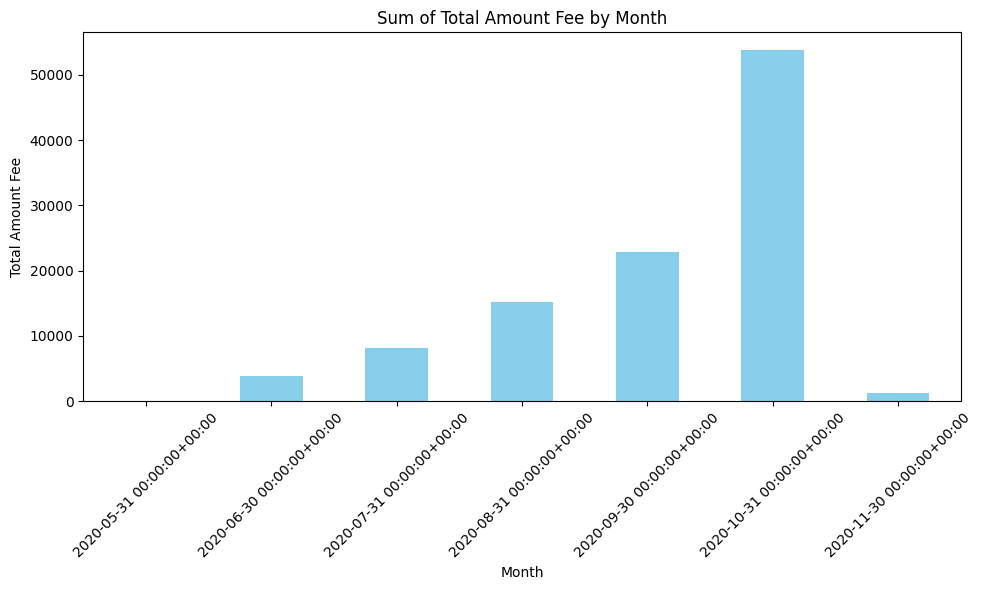

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Convert 'created_at_fee' to datetime if it's not already
merged_df['created_at_fee'] = pd.to_datetime(merged_df['created_at_fee'])

# Group by month and sum 'total_amount_fee'
monthly_sum = merged_df.resample('M', on='created_at_fee')['total_amount_fee'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_sum.plot(kind='bar', color='skyblue')
plt.title('Sum of Total Amount Fee by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount Fee')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/7z/00rgwf311yn2q_dbm8dwq25m0000gn/T/ipykernel_2915/3723813568.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum2 = merged_df.resample('M', on='created_at')['total_amount_fee'].sum()


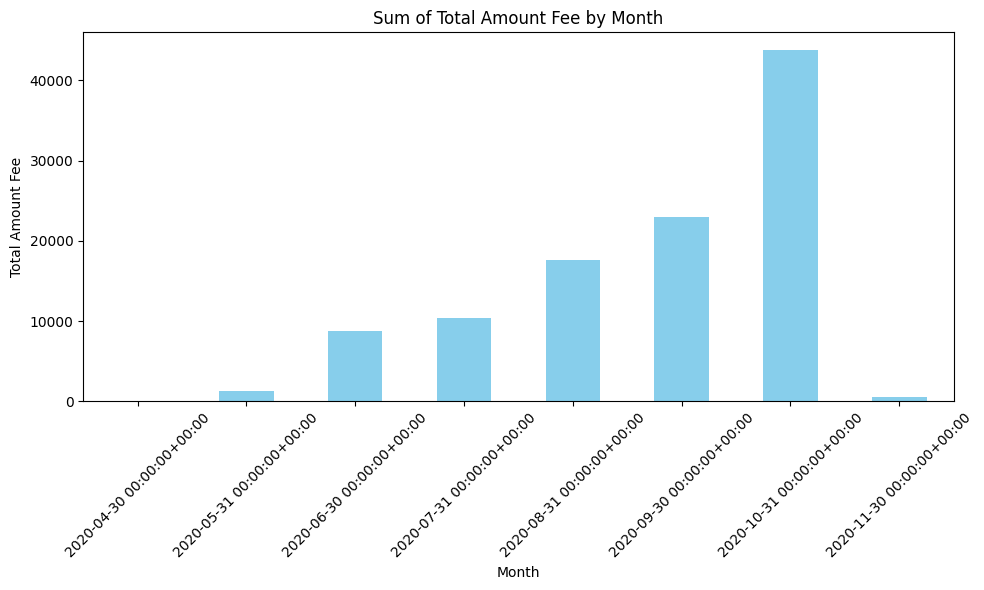

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Convert 'created_at_fee' to datetime if it's not already
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])

# Group by month and sum 'total_amount_fee'
monthly_sum2 = merged_df.resample('M', on='created_at')['total_amount_fee'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_sum2.plot(kind='bar', color='skyblue')
plt.title('Sum of Total Amount Fee by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount Fee')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/7z/00rgwf311yn2q_dbm8dwq25m0000gn/T/ipykernel_2915/37380398.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = merged_df.resample('M', on='created_at')['amount'].sum()


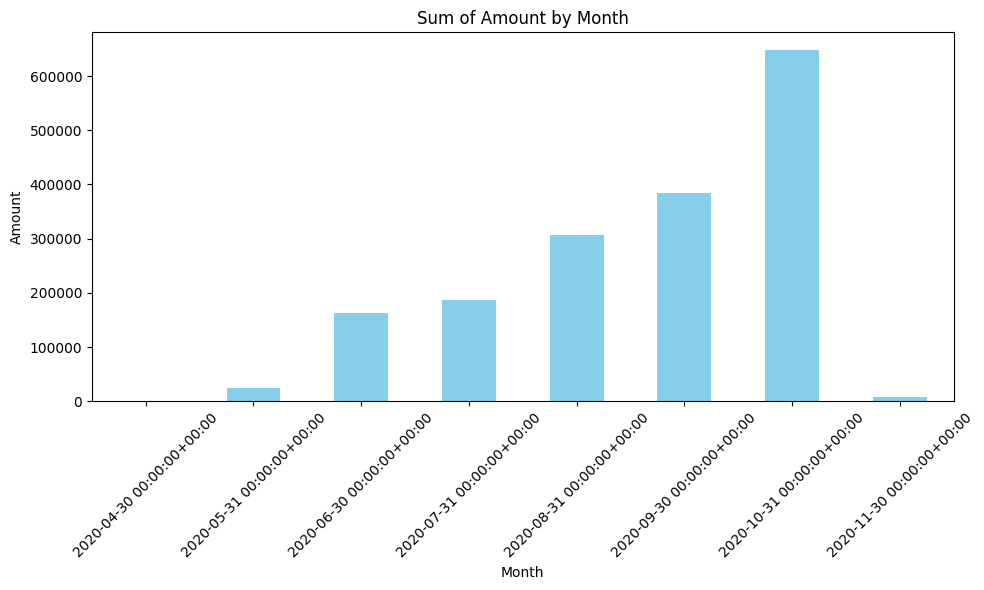

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Convert 'created_at' to datetime if it's not already
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])

# Group by month and sum 'amount'
monthly_sum = merged_df.resample('M', on='created_at')['amount'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_sum.plot(kind='bar', color='skyblue')
plt.title('Sum of Amount by Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Convert 'created_at_fee' to datetime if it's not already
merged_df['created_at_fee'] = pd.to_datetime(merged_df['created_at_fee'])

# Group by month and count the number of records
monthly_counts = merged_df.resample('ME', on='created_at_fee').size()

print(monthly_counts)

created_at_fee
2020-05-31 00:00:00+00:00       16
2020-06-30 00:00:00+00:00      769
2020-07-31 00:00:00+00:00     1619
2020-08-31 00:00:00+00:00     3048
2020-09-30 00:00:00+00:00     4572
2020-10-31 00:00:00+00:00    10766
2020-11-30 00:00:00+00:00      267
Freq: ME, dtype: int64
